NLTK Preprocessing steps: Compare Text Analytics, NLP and Text Mining Text Analysis Operations using NLTK Tokenization Stopwords Lexicon Normalization such as Stemming and Lemmatization POS Tagging

In [1]:
#Import nltk and 'punkt' to used the .tokenized() method
import nltk
import os
nltk.download('punkt')
nltk.download('vader_lexicon')
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import FreqDist
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /Users/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/david/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Had issues with columns data type: 'float object is not iterable'
# Need to change the file path to match where the resource is saved
filepath = os.path.join("..","..","Resources","RT_CLEAN_DATA.csv")
df = pd.read_csv(filepath, encoding = "ISO-8859-1")
# df.head()

In [3]:
df=df[df['Question Number']==13]

In [4]:
list(df)

['Instructor Name (encoded)',
 'Instructor ID',
 'Learning Assignment: Completed On',
 'Learning Assignment: Learning Plan: Learning Plan Name',
 'Learning Assignment: Times Launched',
 'Learning Assignment: Learning Plan Section: Learning Plan Section Name',
 'Question Number',
 'Question Text',
 'Response Text Long',
 'Taught in Last 12 Months',
 'Avg. Score - Knowledge of the course content',
 'Avg. Score - Training and facilitation skills',
 'Number of Classes Taught',
 'Number of Attendees',
 'COUNT NAME',
 'CLEAN']

In [5]:
df.dtypes

Instructor Name (encoded)                                                  object
Instructor ID                                                               int64
Learning Assignment: Completed On                                           int64
Learning Assignment: Learning Plan: Learning Plan Name                     object
Learning Assignment: Times Launched                                         int64
Learning Assignment: Learning Plan Section: Learning Plan Section Name     object
Question Number                                                           float64
Question Text                                                              object
Response Text Long                                                         object
Taught in Last 12 Months                                                     bool
Avg. Score - Knowledge of the course content                              float64
Avg. Score - Training and facilitation skills                             float64
Number of Classe

In [6]:
df.shape[0]

304

In [7]:
#For rows in column 'Response Text Long' set to lowercase
response_lower_case=[]

for idx, row in df.iterrows(): 
    lower=(str(row['Response Text Long'])).lower()
    response_lower_case.append(lower)

In [8]:
df['response_lower_case']=response_lower_case
df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case
16,11r4n0T5ck2r,577,44228,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,answer questions in the chat,True,4.63,4.55,35,33,20,Clean,answer questions in the chat
32,12r3c0S4l4w,591,44149,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chats and students.,True,4.71,4.71,1,17,20,Clean,monitor chats and students.
55,1l2ks1ndr10Mrt2nss4n,605,44145,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,monitor questions from students,True,4.87,4.87,2,23,20,Clean,monitor questions from students
76,1l2x0Cr5z,618,44250,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chat,True,4.83,4.61,4,43,20,Clean,monitor chat
92,1l2x1ndr10R1tt16,612,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Moderate the chat,True,4.50,4.35,4,62,20,Clean,moderate the chat


In [9]:
# Removing punctuations in lower case reponse string
# Using regex
import re

clean_list=[]

for idx, row in df.iterrows(): 
#     if row['What_can_SAI_make_easier_for_you__c']: 
    res = re.sub(r'[^\w\s]', '', row['response_lower_case'])
    clean_list.append(res)

In [10]:
# Verify clean list has removed punctuation and that the length is the same as the lower case response list
# clean_list
len(clean_list)

304

In [11]:
#Add clean list to data frame
df['clean_response']=clean_list

In [12]:
df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,clean_response
16,11r4n0T5ck2r,577,44228,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,answer questions in the chat,True,4.63,4.55,35,33,20,Clean,answer questions in the chat,answer questions in the chat
32,12r3c0S4l4w,591,44149,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chats and students.,True,4.71,4.71,1,17,20,Clean,monitor chats and students.,monitor chats and students
55,1l2ks1ndr10Mrt2nss4n,605,44145,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,monitor questions from students,True,4.87,4.87,2,23,20,Clean,monitor questions from students,monitor questions from students
76,1l2x0Cr5z,618,44250,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chat,True,4.83,4.61,4,43,20,Clean,monitor chat,monitor chat
92,1l2x1ndr10R1tt16,612,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Moderate the chat,True,4.50,4.35,4,62,20,Clean,moderate the chat,moderate the chat


In [13]:
#Add sentiment analysis 
#VADER = *not darth* Valence Aware Dictionary for Sentiment Reasoning
# -1 (most extreme negative) and +1 (most extreme positive)
df['response_text_scores'] = df['clean_response'].apply(lambda Impediments:sid.polarity_scores(Impediments))

df['clean_response_negative'] = df['response_text_scores'].apply(lambda a:a['neg'])
df['clean_response_neutral'] = df['response_text_scores'].apply(lambda b:b['neu'])
df['clean_response_positive'] = df['response_text_scores'].apply(lambda c:c['pos'])
df['clean_response_compound'] = df['response_text_scores'].apply(lambda d:d['compound'])



In [14]:
df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,...,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,clean_response,response_text_scores,clean_response_negative,clean_response_neutral,clean_response_positive,clean_response_compound
16,11r4n0T5ck2r,577,44228,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,answer questions in the chat,True,...,33,20,Clean,answer questions in the chat,answer questions in the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
32,12r3c0S4l4w,591,44149,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chats and students.,True,...,17,20,Clean,monitor chats and students.,monitor chats and students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
55,1l2ks1ndr10Mrt2nss4n,605,44145,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,monitor questions from students,True,...,23,20,Clean,monitor questions from students,monitor questions from students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
76,1l2x0Cr5z,618,44250,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chat,True,...,43,20,Clean,monitor chat,monitor chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
92,1l2x1ndr10R1tt16,612,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Moderate the chat,True,...,62,20,Clean,moderate the chat,moderate the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0


In [15]:
#Use tokenizer to divide a text into a list of sentences using an unsupervised algorithm 
#RegexpTokenizer splits a string into substrings using a regular expression - used this method because it removes punctuations
from nltk.tokenize import RegexpTokenizer

tokens_list=[]

tokenizer = RegexpTokenizer(r'\w+')
for idx, row in df.iterrows(): 
#     if row['What_can_SAI_make_easier_for_you__c']: 
    tokens=tokenizer.tokenize(str(row['clean_response']))
    tokens_list.append(tokens)

In [16]:
#View tokens_list
tokens_list

[['answer', 'questions', 'in', 'the', 'chat'],
 ['monitor', 'chats', 'and', 'students'],
 ['monitor', 'questions', 'from', 'students'],
 ['monitor', 'chat'],
 ['moderate', 'the', 'chat'],
 ['manage', 'the', 'hat', 'questions', 'and', 'helps', 'needed'],
 ['monitoring',
  'the',
  'time',
  'parking',
  'lot',
  'questions',
  'reminder',
  'on',
  'the',
  'time',
  'also',
  'prepare',
  'for',
  'the',
  'next',
  'group',
  'activity'],
 ['the', 'breakout', 'sessions', 'and', 'helping', 'in', 'the', 'activities'],
 ['a',
  'cotrainer',
  'can',
  'watch',
  'for',
  'qa',
  'as',
  'they',
  'are',
  'typed',
  'into',
  'chat',
  'they',
  'can',
  'watch',
  'the',
  'timebox',
  'and',
  'get',
  'the',
  'virtual',
  'room',
  'ready',
  'for',
  'the',
  'next',
  'breakout'],
 ['monitor', 'and', 'answer', 'questions', 'in', 'chat'],
 ['moderate', 'chats'],
 ['eg', 'create', 'breakout', 'rooms', 'manage', 'tools'],
 ['monitor', 'the', 'chat'],
 ['manage',
  'the',
  'different'

In [17]:
len(tokens_list)

304

In [18]:
#Add tokenized list of words to df
df['tokenized_words']=tokens_list
# df=df.drop(columns=['tokenized_words_lower'])

df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,...,COUNT NAME,CLEAN,response_lower_case,clean_response,response_text_scores,clean_response_negative,clean_response_neutral,clean_response_positive,clean_response_compound,tokenized_words
16,11r4n0T5ck2r,577,44228,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,answer questions in the chat,True,...,20,Clean,answer questions in the chat,answer questions in the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[answer, questions, in, the, chat]"
32,12r3c0S4l4w,591,44149,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chats and students.,True,...,20,Clean,monitor chats and students.,monitor chats and students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, chats, and, students]"
55,1l2ks1ndr10Mrt2nss4n,605,44145,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,monitor questions from students,True,...,20,Clean,monitor questions from students,monitor questions from students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, questions, from, students]"
76,1l2x0Cr5z,618,44250,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chat,True,...,20,Clean,monitor chat,monitor chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, chat]"
92,1l2x1ndr10R1tt16,612,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Moderate the chat,True,...,20,Clean,moderate the chat,moderate the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[moderate, the, chat]"


In [19]:
# Determine length of 'tokenized words'
df['tokenized_word_count']=df['tokenized_words'].str.len()

df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,...,CLEAN,response_lower_case,clean_response,response_text_scores,clean_response_negative,clean_response_neutral,clean_response_positive,clean_response_compound,tokenized_words,tokenized_word_count
16,11r4n0T5ck2r,577,44228,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,answer questions in the chat,True,...,Clean,answer questions in the chat,answer questions in the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[answer, questions, in, the, chat]",5
32,12r3c0S4l4w,591,44149,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chats and students.,True,...,Clean,monitor chats and students.,monitor chats and students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, chats, and, students]",4
55,1l2ks1ndr10Mrt2nss4n,605,44145,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,monitor questions from students,True,...,Clean,monitor questions from students,monitor questions from students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, questions, from, students]",4
76,1l2x0Cr5z,618,44250,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chat,True,...,Clean,monitor chat,monitor chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, chat]",2
92,1l2x1ndr10R1tt16,612,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Moderate the chat,True,...,Clean,moderate the chat,moderate the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[moderate, the, chat]",3


In [20]:
#Apply stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
# Using stopwords from English Languages
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Itterate through df 'tokenized_words' for stop words
filtered_words_all=[]
for index, row in df.iterrows():
    filtered_words=[]
    tokenized_words=row['tokenized_words']
    for word in tokenized_words:
        if word not in stop_words:
            filtered_words.append(word)
    filtered_words_all.append(filtered_words)
print(filtered_words_all)   

[['answer', 'questions', 'chat'], ['monitor', 'chats', 'students'], ['monitor', 'questions', 'students'], ['monitor', 'chat'], ['moderate', 'chat'], ['manage', 'hat', 'questions', 'helps', 'needed'], ['monitoring', 'time', 'parking', 'lot', 'questions', 'reminder', 'time', 'also', 'prepare', 'next', 'group', 'activity'], ['breakout', 'sessions', 'helping', 'activities'], ['cotrainer', 'watch', 'qa', 'typed', 'chat', 'watch', 'timebox', 'get', 'virtual', 'room', 'ready', 'next', 'breakout'], ['monitor', 'answer', 'questions', 'chat'], ['moderate', 'chats'], ['eg', 'create', 'breakout', 'rooms', 'manage', 'tools'], ['monitor', 'chat'], ['manage', 'different', 'channels', 'breakout', 'rooms', 'issues', 'arise'], ['answer', 'chat', 'questions', 'prepare', 'materials', 'activities', 'take', 'notes', 'parking', 'lot', 'questions'], ['solve', 'technical', 'difficulities', 'answer', 'questions', 'chat'], ['cotrainer', 'support', 'breakouts', 'prevent', 'trainer', 'frantically', 'move', 'break'

In [22]:
df['filtered_words']=filtered_words_all

In [23]:
# Word count of filtered reponse
df['filtered_word_count']=df['filtered_words'].str.len()



In [24]:
df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,...,clean_response,response_text_scores,clean_response_negative,clean_response_neutral,clean_response_positive,clean_response_compound,tokenized_words,tokenized_word_count,filtered_words,filtered_word_count
16,11r4n0T5ck2r,577,44228,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,answer questions in the chat,True,...,answer questions in the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[answer, questions, in, the, chat]",5,"[answer, questions, chat]",3
32,12r3c0S4l4w,591,44149,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chats and students.,True,...,monitor chats and students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, chats, and, students]",4,"[monitor, chats, students]",3
55,1l2ks1ndr10Mrt2nss4n,605,44145,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,monitor questions from students,True,...,monitor questions from students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, questions, from, students]",4,"[monitor, questions, students]",3
76,1l2x0Cr5z,618,44250,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chat,True,...,monitor chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[monitor, chat]",2,"[monitor, chat]",2
92,1l2x1ndr10R1tt16,612,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Moderate the chat,True,...,moderate the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,"[moderate, the, chat]",3,"[moderate, chat]",2


In [27]:
#Export dataframe to csv
savefilepath = os.path.join("..","..","Resources","RT_OUTPUT_DATA.csv")
df.to_csv(savefilepath,index=False)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


array([[<AxesSubplot:title={'center':'Instructor ID'}>,
        <AxesSubplot:title={'center':'Learning Assignment: Completed On'}>,
        <AxesSubplot:title={'center':'Learning Assignment: Times Launched'}>,
        <AxesSubplot:title={'center':'Question Number'}>],
       [<AxesSubplot:title={'center':'Taught in Last 12 Months'}>,
        <AxesSubplot:title={'center':'Avg. Score - Knowledge of the course content'}>,
        <AxesSubplot:title={'center':'Avg. Score - Training and facilitation skills'}>,
        <AxesSubplot:title={'center':'Number of Classes Taught'}>],
       [<AxesSubplot:title={'center':'Number of Attendees'}>,
        <AxesSubplot:title={'center':'COUNT NAME'}>,
        <AxesSubplot:title={'center':'clean_response_negative'}>,
        <AxesSubplot:title={'center':'clean_response_neutral'}>],
       [<AxesSubplot:title={'center':'clean_response_positive'}>,
        <AxesSubplot:title={'center':'clean_response_compound'}>,
        <AxesSubplot:title={'center':'toke

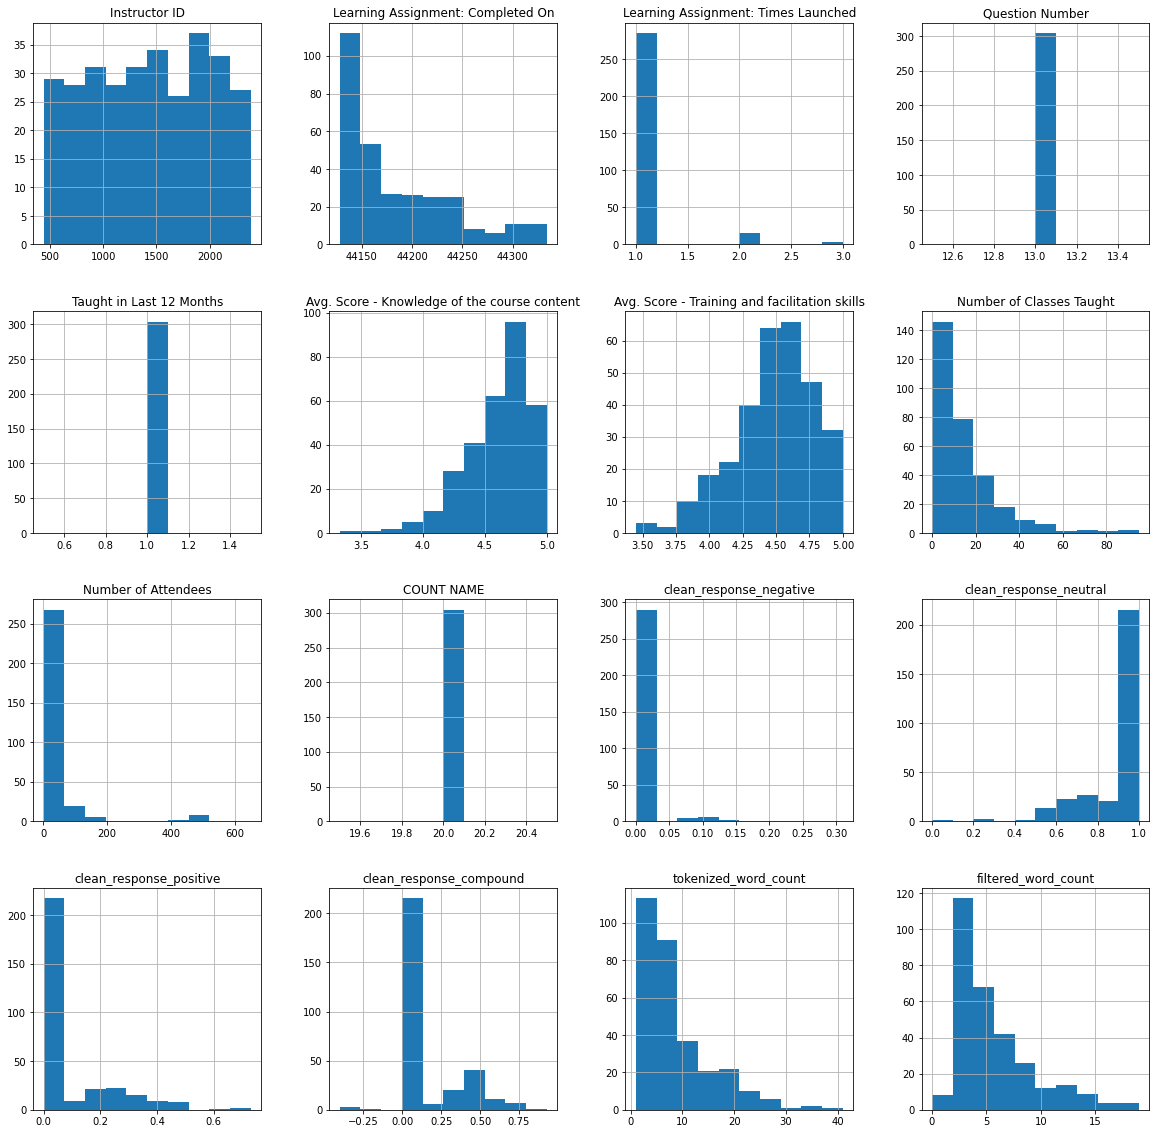

In [25]:
# Histogram of all numericla variables in data set
df.hist(figsize=[20,20])

In [ ]:
from scipy.stats import linregress

In [ ]:
for i in range(19,20):
    variable='tokenized_word_count'
    x=df[df['Question Number']==i][variable]
    y=df[df['Question Number']==i]['Avg. Score - Training and facilitation skills']

    plt.scatter(x,y)
    plt.title(f'Question: {i}')
    plt.xlabel(variable)
    plt.ylabel('Avg Training and Facilitaiton Score')
    plt.grid(b=True)
    # plt.xlim(0,90)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(20,4),color="red")
    plt.annotate(f'r-value={round(rvalue,2)}',(20,3.8),color="red")

In [ ]:
variable='tokenized_word_count'

for i in range(19,20):
    x=df[df['Question Number']==i][variable]
    y=df[df['Question Number']==i]['Avg. Score - Training and facilitation skills']

    plt.scatter(x,y)
    plt.title(f'Question: {i}')
    plt.xlabel(variable)
    plt.ylabel('Avg Training and Facilitaiton Score')
    plt.grid(b=True)
    # plt.xlim(0,90)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(20,4),color="red")
    plt.annotate(f'r-value={round(rvalue,2)}',(20,3.8),color="red")

In [ ]:
# Scatter plot of reponse length and facility score, question 1
# Response Length = Try Hard = Good Scores
# x=df['tokenized_word_count']

for i in range(3,4):
    df[df['Question Number']==i].plot.scatter(x='tokenized_word_count', y='Avg. Score - Training and facilitation skills', title=f'Question:{i}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df['tokenized_word_count'], df['Avg. Score - Training and facilitation skills'])
    regress_values = df['tokenized_word_count'] * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.plot(df['tokenized_word_count'],regress_values,"r-")
#     plt.annotate(line_eq,(50,300),fontsize=15,color="red")
#     plt.annotate(f'r-value={round(rvalue,2)}',(50,290),fontsize=15,color="red")
    print(f'slope:{slope}, intercept:{intercept}, rvalue:{rvalue}, pvalue:{pvalue}, stderr:{stderr}')

In [ ]:
# Scatter plot of reponse length and facility score, question 1
# Response Length = Try Hard = Good Scores
for i in range(1,21):
    df[df['Question Number']==i].plot.scatter(x='filtered_word_count', y='Avg. Score - Training and facilitation skills',title=f'Question:{i}')

In [ ]:
# Scatter plot of compound Sentiment and facility score, question X
for i in range(1,21):
    df[df['Question Number']==i].plot.scatter(x='clean_response_compound', y='Avg. Score - Training and facilitation skills',title=f'Question:{i}')

In [ ]:
# df[df['Question Number']==13].

In [ ]:
# clean_response_positive

for i in range(1,21):
    df[df['Question Number']==i].plot.scatter(x='clean_response_positive', y='Avg. Score - Training and facilitation skills',title=f'Question:{i}')

In [ ]:
#Cannot pass an iterable list as an argument in WordNetLemmatizer, therefore needed to add the lists together
toke_allWords = []
for wordList in df['filtered_words']:
    toke_allWords += wordList

In [ ]:
toke_allWords

In [ ]:
len(toke_allWords)

!!! Normalizing the Data - Stemming VS Lemmatization & Pos_tag!!!
Stemming is used to nomralize parts of text data - i.e. will shorten all conjugated verbs to the shortest length of characters possible. Lemmatization is used in NLP and will enable for words that do not have the same root to be grouped together in order for them to be processed as one item.

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
#WordNetLemmtaizer is not iterable, thereofre we couldn't lemmatize individually
lemmatizer = WordNetLemmatizer()

#Lemmatize tokens1_stop
lemmatized_output = [lemmatizer.lemmatize(w) for w in toke_allWords]
print(lemmatized_output)

In [ ]:
len(lemmatized_output) #Doesn't appear to be any change with lemmatization

In [ ]:
#Lemmatize with POS Tag
# from nltk import pos_tag
# from nltk.corpus import wordnet
# import nltk
nltk.download('averaged_perceptron_tagger')

NLTK POS Tags Examples are as Below: https://www.guru99.com/pos-tagging-chunking-nltk.html#:~:text=Some%20NLTK%20POS%20tagging%20examples,tagging%20with%20NLTK%20is%20complete.

In [ ]:
# #POS Tag = Parts of Speech Tagging is a process to mark up the words in text format
#*********!!Kept getting 'Function is note iterable' for POS_TAG!!***********

# tagged_words = []

# for word in df.loc[0, 'filtered_words']:
#     if word not in pos_tag:
#         filtered_word.append(word)

In [ ]:
# tagged_words = pos_tag(df.loc[0, 'filtered_words'])
# print(tagged_words)

In [ ]:
#POS Tag = Parts of Speech Tagging is a process to mark up the words in text format
tagged_words = pos_tag(lemmatized_output)
print(tagged_words)

In [ ]:
#Create a dictionary of word frequency with Frequency Distribution?
#Determine the frequency occurence of each word is column

#Most common words in responses
total_freq_dist_pos = FreqDist(tagged_words)
print(total_freq_dist_pos.most_common(20))

Preparing Data for the Model 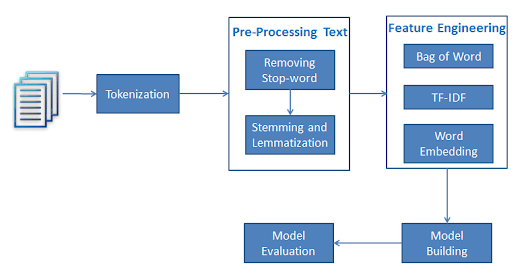

In [ ]:
#Create a dictionary of word frequency with Frequency Distribution?
#Determine the frequency occurence of each word is column
from nltk import FreqDist

#Most common part of the column ''What_can_SAI_make_easier_for_you__c'.
total_freq_dist_pos = FreqDist(tagged_words)
print(total_freq_dist_pos.most_common(20))

Bag of Words -is a representation of text that describes the occurrence of words within a document. 

It involves two things:

A vocabulary of known words.
A measure of the presence of known words.

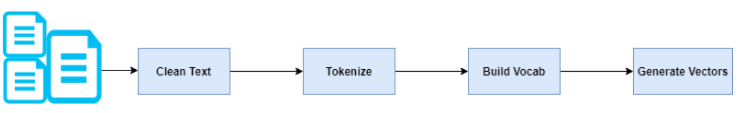

# Create BOW Model VS CountVectorizer

In [ ]:
df['tokenized_words'] =[" ".join(word) for word in df['tokenized_words'].values]

In [ ]:
df['filtered_words'] =[" ".join(word) for word in df['filtered_words'].values]

In [ ]:
#Calculate tf-idf scores using sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['filtered_words'])

In [ ]:
#Check the result of maxtrix rom calculation

df_TF_IDF = pd.DataFrame(x.toarray(), 
columns=tfidf.get_feature_names())
print(df_TF_IDF)

Note: The high value for each word means the high term frequency weighted by rarity of term’s occurrences. We now understand how to calculate tf-idf.

In [ ]:
df_TF_IDF.to_csv(r'matrix.csv')

In [ ]:
df_TF_IDF.head()